#### Riemann sum

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 2*x

In [3]:
def integrate(f, a, b, dx):
    total=0
    N = int((b-a)/dx)
    for n in range(N):
        total += f(a+n*dx)*dx
    return total

In [4]:
integrate(f, 0, 10, 0.01)  # theoretically, area = 100.0

99.89999999999999

- We use a numerical integration for solving differential equation.
- for example,
$$\frac{d}{dt} x(t) = \cos (t), x_0 = 0$$

In [5]:
def dx_func(t):
    return math.cos(t)

In [6]:
times=[]
values=[]
labels=[]

x=0 # initial condition
t=0 
dt = 0.2
T = 10

In [7]:
for i in range(int(T//dt)):
    t += dt
    dx = dx_func(t)
    x = x + dx*dt
    times.append(t)
    values.append(x)
    labels.append(math.sin(t))

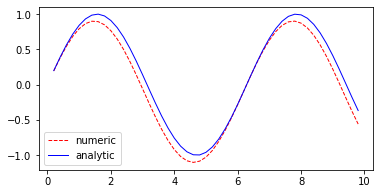

In [8]:
plt.figure(figsize=(6,3))
plt.plot(times, values, 'r--', linewidth=1, label='numeric')
plt.plot(times, labels, 'b', linewidth=1, label='analytic')
plt.legend()
plt.show()

#### Numerical methods for 2nd order  ODEs
- Euler-Cromer, Runge-Kutta 4, Leapfrog, etc

<img src=attachment:image.png width=250>
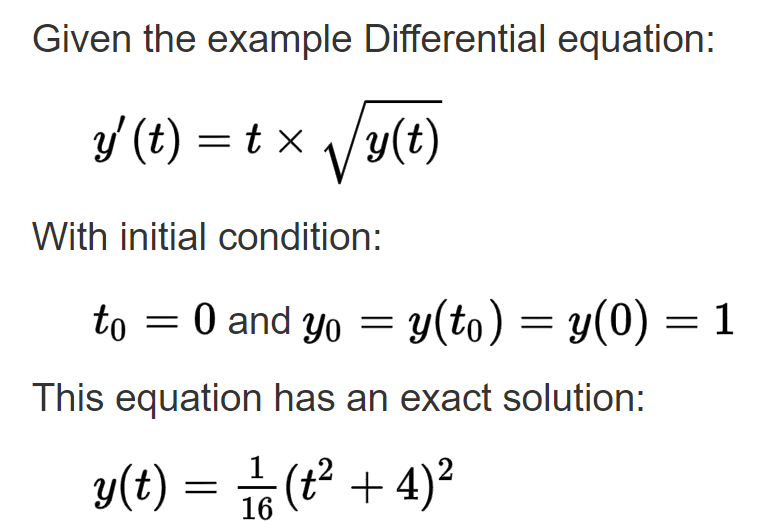

In [9]:
def rk4(fun, y0, t, dt, *args, **kwargs):
    dt2 = dt / 2.0
    k1 = fun(y0, t, *args, **kwargs)
    k2 = fun(y0 + dt2 * k1, t + dt2, *args, **kwargs)
    k3 = fun(y0 + dt2 * k2, t + dt2, *args, **kwargs)
    k4 = fun(y0 + dt * k3, t + dt, *args, **kwargs)
    dy = dt / 6.0 * (k1 + 2 * k2 + 2 * k3 + k4)
    return dy

In [10]:
def dy_func(y, t):
    return t*np.sqrt(y)

In [11]:
def analytic_solution(t): 
    return (t**2 + 4)**2 /16

In [12]:
y=1  #initial condition, y0=1
y_naive = 1
t=0
dt = 0.01
while t<=10:
    t, y = t + dt, y + rk4(fun=dy_func, y0=y, t=t, dt=dt)
    
print('analytic: ', analytic_solution(10))
print('rk4: ', y)


analytic:  676.0
rk4:  678.6038024953034
